# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [ ]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Task 1

Task 1: Understand the data



Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [ ]:
df = pd.read_csv('hospital-info.csv')

In [ ]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [ ]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [ ]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
c = [x for x in list(df.columns) if x not in features]
df[c].describe()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
count,3057.000000,3057.000000,3.057000e+03,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,...,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,261817.891397,51757.296696,5.913678e+09,3.025842,-14.052018,-3.331371,-8.072746,-12.041911,-16.351943,-14.889518,...,-0.963980,-0.871177,-0.986907,-0.842215,-8.697796,-2.937054,-4.716686,-2.965375,-39.967077,-9.146034
std,159800.930561,27935.174759,2.383292e+09,0.869600,1.096588,0.507906,1.140871,1.453870,2.165716,1.519375,...,0.644294,0.449185,0.669359,0.485605,9.039672,5.102808,1.618808,1.422932,4.684942,4.802502
min,10001.000000,613.000000,9.369338e+08,1.000000,-20.000000,-8.300000,-14.100000,-17.800000,-26.800000,-23.300000,...,-5.216000,-4.819000,-7.017000,-3.741000,-76.200000,-56.300000,-13.600000,-14.000000,-63.400000,-64.300000
25%,110089.000000,30223.000000,3.607345e+09,2.000000,-14.500000,-3.331371,-8.700000,-12.900000,-17.600000,-15.600000,...,-1.065000,-0.871177,-0.987212,-1.110000,-9.900000,-2.936245,-5.200000,-3.200000,-39.964766,-10.100000
50%,260022.000000,48617.000000,6.072744e+09,3.000000,-14.054091,-3.331371,-8.000000,-12.043653,-16.300000,-14.889760,...,-0.963980,-0.871177,-0.987212,-0.841970,-6.100000,-1.100000,-4.716942,-2.964405,-39.964766,-8.900000
75%,390142.000000,76017.000000,8.059556e+09,4.000000,-13.400000,-3.331371,-7.300000,-11.100000,-15.000000,-14.000000,...,-0.630000,-0.871177,-0.712000,-0.554000,-3.400000,-0.200000,-4.000000,-2.200000,-39.964766,-6.600000
max,670098.000000,99801.000000,9.898943e+09,5.000000,-9.400000,-1.400000,-4.600000,-6.600000,-8.700000,-9.300000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-14.900000,-0.000000


<Axes: xlabel='Hospital overall rating', ylabel='count'>

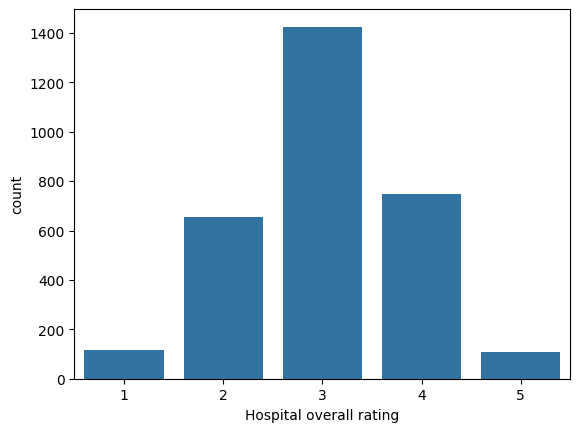

In [ ]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures

# Hospital Overall Rating Frequency Overall
sns.countplot(data=df,x='Hospital overall rating')

Hospital overall rating                   1.000000
rating_group                              0.956810
EXP_H_STAR_RATING_Score                   0.595666
Patient experience national comparison    0.586112
EXP_H_COMP_7_STAR_RATING_Score            0.580654
                                            ...   
READM_30_AMI_Score                       -0.284801
READM_30_COPD_Score                      -0.322245
READM_30_HF_Score                        -0.389452
READM_30_PN_Score                        -0.391958
READM_30_HOSP_WIDE_Score                 -0.603466
Name: Hospital overall rating, Length: 87, dtype: float64

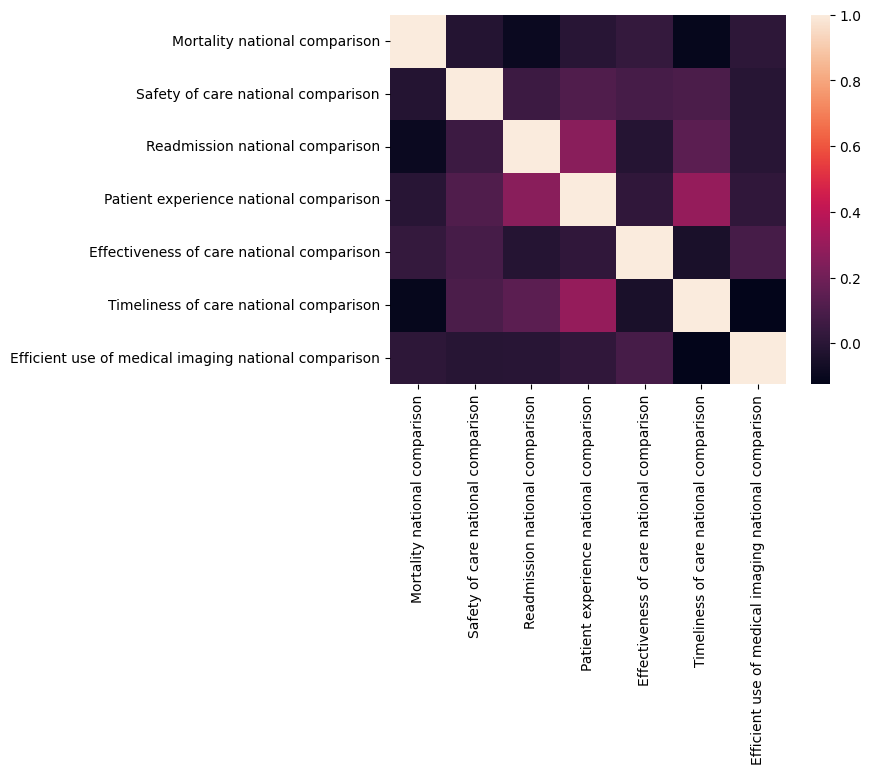

In [ ]:
# Correlation Matrix and Heatmap
sns.heatmap(df[features].corr())
df.corr()['Hospital overall rating'].sort_values(ascending=False)

In [ ]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

# Pivot for the hospital ratings by state and hospital ownership
df_pivot = pd.pivot_table(data=df,values='Hospital overall rating',index=df[['State','Hospital Ownership']],columns=None,aggfunc='sum',fill_value=0)
df_pivot.sort_values(by='Hospital overall rating',ascending=False)

Hospital overall rating
State Hospital Ownership                         
CA    Voluntary                               501
PA    Voluntary                               357
TX    Voluntary                               356
      Others                                  346
OH    Voluntary                               344
...                                           ...
CT    Government                                3
NE    Government                                2
DC    Others                                    2
WY    Voluntary                                 2
NV    Government                                1

[140 rows x 1 columns]


Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [ ]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [ ]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(demo_features,axis=1)

In [ ]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [ ]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
df2.drop(['Hospital Ownership','Emergency Services','rating_group'],axis=1,inplace=True)

##### Map the ratings

- 1,2,3 will be 0
- 4,5 will be 1

In [ ]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
rating_flag = lambda rat: [1 if i>3 else 0 for i in rat]
df2['Hospital overall rating'] = rating_flag(df2['Hospital overall rating'])
df2['Hospital overall rating'] = df2['Hospital overall rating'].astype('category')

##### Convert the datatypes of the categorical variables

In [ ]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype
### This will be useful when you create dummy variables next
for feature in features:
  df2[feature] = df2[feature].astype('category')

##### Data Preparation and Train-test split

In [ ]:
### Create X and y variable
X = df2.drop('Hospital overall rating',axis=1)
y = df2['Hospital overall rating']

In [ ]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset
cat_cols = list(pd.DataFrame(X.dtypes)[pd.DataFrame(X.dtypes)[0]=='category'].index)
pd.get_dummies(X[cat_cols],drop_first=True)

,Mortality national comparison_1,Mortality national comparison_2,Safety of care national comparison_1,Safety of care national comparison_2,Readmission national comparison_1,Readmission national comparison_2,Patient experience national comparison_1,Patient experience national comparison_2,Effectiveness of care national comparison_1,Effectiveness of care national comparison_2,Timeliness of care national comparison_1,Timeliness of care national comparison_2,Efficient use of medical imaging national comparison_1,Efficient use of medical imaging national comparison_2
0,1,0,0,1,1,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,1,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,1,1,0
3,1,0,1,0,0,0,1,0,1,0,0,1,1,0
4,1,0,1,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,1,0,1,0,1,0,1,0,0,1,1,0,1,0
3053,1,0,1,0,1,0,0,1,1,0,0,1,1,0
3054,1,0,1,0,1,0,0,0,0,0,0,1,1,0
3055,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice
## Split it in the ratio of 70-30
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=777)

In [ ]:
# Scale and Standardize the numerical variables
# Standardize and Scale
num_cols = list(pd.DataFrame(X.dtypes)[pd.DataFrame(X.dtypes)[0]!='category'].index)

scaler = StandardScaler()
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_val[num_cols]= scaler.fit_transform(X_val[num_cols])

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

In [ ]:
# RMSE Function
def rmse(y_train, y_pred):
  return np.sqrt(mean_squared_error(y_train, y_pred))

### Logistic Regression Model

In [ ]:
# Logistic Regression Model
log_reg_model = LogisticRegression(penalty=None,solver='lbfgs',random_state=0,max_iter=10000).fit(X_train,y_train)
log_y_pred = log_reg_model.predict(X_val)

log_accuracy_score = accuracy_score(y_val,log_y_pred)
log_rmse = rmse(y_val,log_y_pred)
log_f1_score = f1_score(y_val,log_y_pred)
log_recall_score = recall_score(y_val,log_y_pred)
log_precision_score = precision_score(y_val,log_y_pred)

log_reg_model_best_scores = [log_accuracy_score,log_rmse,log_f1_score,log_recall_score,log_precision_score]
log_reg_model_best_scores

[0.954248366013072,
 0.2138963159732493,
 0.9179687499999999,
 0.9215686274509803,
 0.914396887159533]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(log_y_pred,y_val)

array([[641,  20],
       [ 22, 235]])

### K-Nearest Neighbors Model

In [ ]:
# Find best k
param_grid = {
    'n_neighbors': np.arange(0,50,1)
}
knn_clf = KNeighborsRegressor()
gs = GridSearchCV(knn_clf,param_grid=param_grid,cv=5,scoring='roc_auc',return_train_score=True).fit(X_train,y_train)

gs.best_params_

{'n_neighbors': 40}

In [ ]:
# Best K-Model
knn_model_best = KNeighborsClassifier(n_neighbors=int(gs.best_params_['n_neighbors'])).fit(X_train,y_train)
knn_y_pred = knn_model_best.predict(X_val)

knn_accuracy_score = accuracy_score(y_val,knn_y_pred)
knn_rmse = rmse(y_val,knn_y_pred)
knn_f1_score = f1_score(y_val,knn_y_pred)
knn_recall_score = recall_score(y_val,knn_y_pred)
knn_precision_score = precision_score(y_val,knn_y_pred)

knn_model_best_scores = [knn_accuracy_score,knn_rmse,knn_f1_score,knn_recall_score,knn_precision_score]
knn_model_best_scores

[0.8572984749455338,
 0.3777585539130335,
 0.7230443974630021,
 0.6705882352941176,
 0.7844036697247706]

### Decision Tree Model

In [ ]:
param_grid = {
    'max_depth': np.arange(1,50,1),
    'ccp_alpha': np.arange(0,50,1)
}
dt_clf = DecisionTreeClassifier()
gs = GridSearchCV(dt_clf,param_grid=param_grid,cv=5,scoring='roc_auc').fit(X_train,y_train)

gs.best_params_

{'ccp_alpha': 0, 'max_depth': 4}

In [ ]:
dt_model_best = DecisionTreeClassifier(max_depth = gs.best_params_['max_depth'], ccp_alpha = gs.best_params_['ccp_alpha'],random_state=777).fit(X_train,y_train)
dt_y_pred = dt_model_best.predict(X_val)

dt_accuracy_score = accuracy_score(y_val,dt_y_pred)
dt_rmse = rmse(y_val,dt_y_pred)
dt_f1_score = f1_score(y_val,dt_y_pred)
dt_recall_score = recall_score(y_val,dt_y_pred)
dt_precision_score = precision_score(y_val,dt_y_pred)

dt_model_best_scores = [dt_accuracy_score,dt_rmse,dt_f1_score,dt_recall_score,dt_precision_score]
dt_model_best_scores

[0.8562091503267973,
 0.3791976393296807,
 0.7431906614785991,
 0.7490196078431373,
 0.7374517374517374]

### Best Model Selection

In [ ]:
data = [log_reg_model_best_scores,knn_model_best_scores,dt_model_best_scores]
columns = ['Accuracy Scores','RMSE','F1 Score','Recall','Precision']
index = ['Logistic Regression','K Neighbors Classifier','Decision Tree']
pd.DataFrame(data=data,columns=columns,index=index)

,Accuracy Scores,RMSE,F1 Score,Recall,Precision
Logistic Regression,0.954248,0.213896,0.917969,0.921569,0.914397
K Neighbors Classifier,0.857298,0.377759,0.723044,0.670588,0.784404
Decision Tree,0.856209,0.379198,0.743191,0.749020,0.737452


### Task 3

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [ ]:
###Let's read the not_yet_rated dataset
new = pd.read_csv('not_yet_rated.csv')

In [ ]:
## Check the top 5 rows
new.head()

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [ ]:
new.drop(['Hospital Ownership','Provider ID','Emergency Services','rating_group'],axis=1,inplace=True)

In [ ]:
# Categorical Columns
for feature in features:
  new[feature] = new[feature].astype('category')

In [ ]:
# Dummies for Categorical columns
cat_cols = list(pd.DataFrame(X.dtypes)[pd.DataFrame(X.dtypes)[0]=='category'].index)
pd.get_dummies(X[cat_cols],drop_first=True)

,Mortality national comparison_1,Mortality national comparison_2,Safety of care national comparison_1,Safety of care national comparison_2,Readmission national comparison_1,Readmission national comparison_2,Patient experience national comparison_1,Patient experience national comparison_2,Effectiveness of care national comparison_1,Effectiveness of care national comparison_2,Timeliness of care national comparison_1,Timeliness of care national comparison_2,Efficient use of medical imaging national comparison_1,Efficient use of medical imaging national comparison_2
0,1,0,0,1,1,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,1,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,1,1,0
3,1,0,1,0,0,0,1,0,1,0,0,1,1,0
4,1,0,1,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,1,0,1,0,1,0,1,0,0,1,1,0,1,0
3053,1,0,1,0,1,0,0,1,1,0,0,1,1,0
3054,1,0,1,0,1,0,0,0,0,0,0,1,1,0
3055,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
num_cols = list(pd.DataFrame(new.dtypes)[pd.DataFrame(new.dtypes)[0]!='category'].index)

scaler = StandardScaler()
new[num_cols]= scaler.fit_transform(new[num_cols])

In [ ]:
rat_flg = log_reg_model.predict(new)
rat_flg

array([1, 1, 0, 0, 0, 0])

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above.

In [ ]:
coeff = pd.DataFrame(log_reg_model.coef_[0],index=new.columns,columns=['Coefficients'])
coeff.sort_values(by = 'Coefficients', ascending=True)

,Coefficients
READM_30_HOSP_WIDE_Score,-12.261067
READM_30_COPD_Score,-1.172249
Timeliness of care national comparison,-1.053752
EXP_H_STAR_RATING_Score,-1.036054
READM_30_PN_Score,-0.747721
...,...
SAFETY_PSI_90_SAFETY_Score,2.810026
MORT_30_HF_Score,3.708475
MORT_30_PN_Score,4.125172
SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,5.492368
